<a href="https://colab.research.google.com/github/Zelechos/IA_Code/blob/master/Lab10/Mecanismos_de_Atencion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformers - Mecanismos de Atención

### *Hard attention*

#### Crearemos un conjunto de vectores y nos tiene que dar como resultado otro conjunto de vectores en este caso los outputs seran identicos a los inputs y estos prestaran atencion a sus inputs


In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# Creamos nuestro tensor que nos servira como input
X = torch.tensor([[3, 0],[0, 3], [-1, -1]])
X

tensor([[ 3,  0],
        [ 0,  3],
        [-1, -1]])

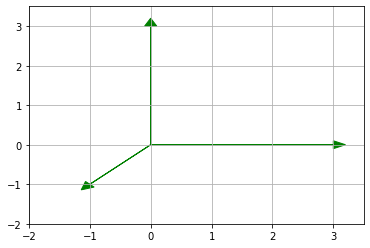

In [26]:
# Ploteamos nuestro tensor
def plot_vectors(X, y=None):
    ax = plt.axes()
    plt.grid()
    for x in X:
        ax.arrow(0, 0, x[0], x[1], head_width=0.2, head_length=0.2, color="green")
    if y is not None:
        for _y in y:
            if _y.sum() != 0:
                ax.arrow(0, 0, _y[0], _y[1], head_width=0.1, head_length=0.1, color='red')
    plt.xlim(-2,3.5)
    plt.ylim(-2,3.5)
    plt.show()

plot_vectors(X)

In [31]:
# hard attention (a es one hot)
# Creamos nuestro vector atencion al primer vector 
Vector_atencion = torch.tensor([1, 0, 0])
Vector_atencion

tensor([1, 0, 0])

Para aplicar nuestro mecanismo de atención, simplemente multiplicamos nuestro conjunto de vectores por el vector de atención.

In [29]:
# todos los vectores en la salida son 0, excepto al que hemos prestado atención
#Aplicamos nuestro mecanismo de atencion
y = Vector_atencion.unsqueeze(1) * X
y

tensor([[3, 0],
        [0, 0],
        [0, 0]])

#### Como podemos ver se marca de rojo al vector que le hemos prestado atencion

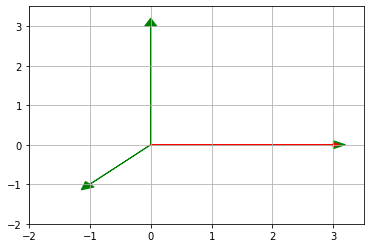

In [30]:
plot_vectors(X, y)

Podemos aplicar este mecanismo en una sola operación a todos los vectores generando una matriz de atención. En el caso de *hard attention*, esta matriz es la identidad.

In [68]:
# Creamos nuestro matriz de Atencion  
Matriz_Atencion = torch.eye(3)
print(Matriz_Atencion)

# Creamos una matriz de inputs
Matriz_Inputs = torch.tensor([[3, 0],[0,3], [-1.5, -1.5]])
print(Matriz_Inputs)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
tensor([[ 3.0000,  0.0000],
        [ 0.0000,  3.0000],
        [-1.5000, -1.5000]])


Multiplicando nuestra matriz de atención por la matriz que contiene todos los vectores de entrada, obtenemos los vectores de salida. En este caso, repetimos, obtendremos exactamente el mismo conjunto de vectores ya que cada vector a la salida atiene únicamente a un vector a la entrada, aquel que está en su misma posición. 

In [69]:
Y = Matriz_Atencion @ Matriz_Inputs
Y

tensor([[ 3.0000,  0.0000],
        [ 0.0000,  3.0000],
        [-1.5000, -1.5000]])

In [76]:
# Ploteamos nuestras matrices
def plot(X, Y):
    fig = plt.figure(figsize=(15,4))
    for i, (x, y) in enumerate(zip(X, Y)):
      ax = plt.subplot(1, 3, i + 1)
      for x in X:
          ax.arrow(0, 0, x[0], x[1], head_width=0.3, color="green", head_length=0.3)
      ax.arrow(0, 0, y[0], y[1], head_width=0.3, head_length=0.3, color='red')
      ax.set_xlim(-2,4.5)
      ax.set_ylim(-2,4.5)
      ax.grid(True)
      ax.set_title(f"Atiende a {X[i].tolist()}")
    plt.tight_layout()
    plt.show()

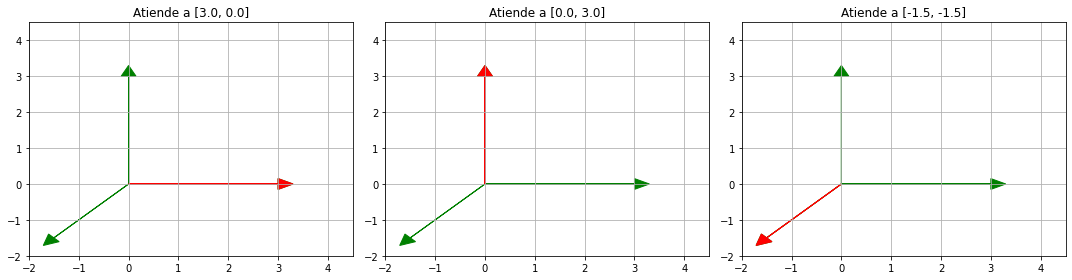

In [77]:
plot(Matriz_Inputs,Y)

## *Soft attention*

#### cada vector generado será una combinación de los *inputs*. En el siguiente ejemplo, cada vector generado presta un 70% de atención al vector en la entrada en su misma posición y un 15% al resto.

In [82]:
# soft attention (cada fila suma 1)

Matriz_Atencion = torch.ones((3, 3))*0.15
Matriz_Atencion.fill_diagonal_(0.70)
Matriz_Atencion

tensor([[0.7000, 0.1500, 0.1500],
        [0.1500, 0.7000, 0.1500],
        [0.1500, 0.1500, 0.7000]])

In [83]:
Y = Matriz_Atencion @ Matriz_Inputs
Y

tensor([[ 1.8750,  0.2250],
        [ 0.2250,  1.8750],
        [-0.6000, -0.6000]])

In [115]:
def plot1(X, Y):
    fig = plt.figure(figsize=(15,4))
    for i, (x, y) in enumerate(zip(X, Y)):
      ax = plt.subplot(1, 3, i + 1)
      for x in X:
          ax.arrow(0, 0, x[0], x[1], color="blue", head_width=0.2, head_length=0.2)
      Z = A[i].unsqueeze(1) * X
      for z in Z:
        ax.arrow(0, 0, z[0], z[1], head_width=0.2, head_length=0.2, color='green')
      ax.arrow(0, 0, y[0], y[1], head_width=0.2, head_length=0.2, color='red')
      ax.set_xlim(-2.5,4.5)
      ax.set_ylim(-2.5,4.5)
      ax.grid(True)
      ax.set_title(f"Atiende a {X[i].tolist()}")
    plt.tight_layout()
    plt.show()

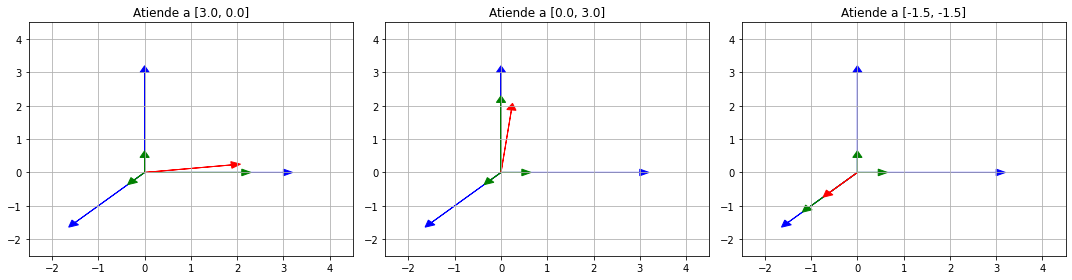

In [116]:
plot1(Matriz_Inputs, Y)